In [150]:
import pandas as pd

#files to load in for dfs
geopolitics_file = "Resources/2016_US_County_Level_Presidential_Results.csv"
file = 'Resources/us-states.csv'
keyfile = 'Resources/stateabbreviationkey.csv'
populationfile = 'Resources/pop_est19.csv'
# read the csv
#reads covid data by state into dataframe
df = pd.read_csv(file, encoding="ISO-8859-1")
#reads state name and abbreviation key into dataframe
key_df = pd.read_csv(keyfile, encoding="ISO-8859-1")
#renames sloppy state column title for merging
key_df.rename(columns = {'ï»¿"State"':'state'}, inplace = True)
#renames code to state abbrv
key_df.rename(columns = {'Code':'state abv.'}, inplace = True)
#merges abbreviation key into main state dataframe
state_pol_df = pd.merge(df, key_df, how="left", on=["state", "state"])
#renames full-name 'state' column for clarity
state_pol_df.rename(columns = {'state':'State Name'}, inplace = True)
#drop unneccessary state abbreviation column
state_pol_df.drop(state_pol_df.columns[5], axis=1)
#creates politics dataframe
geopolitics_df = pd.read_csv(geopolitics_file)
#creates state population dataframe
population_df = pd.read_csv(populationfile)
population_df.rename(columns = {'NAME':'State Name'}, inplace = True)
population_df.head()
states_df = pd.merge(state_pol_df, population_df,  on=["State Name","State Name"])
#drops three letter state abbreviation
states_df = states_df.drop(states_df.columns[5], axis=1)
#drops other irrelevant columns carried over from population_df
states_df = states_df.drop(states_df.columns[6], axis=1)
states_df = states_df.drop(states_df.columns[6], axis=1)
states_df = states_df.drop(states_df.columns[6], axis=1)
states_df = states_df.drop(states_df.columns[6], axis=1)
states_df = states_df.drop(states_df.columns[8], axis=1)
states_df = states_df.drop(states_df.columns[7], axis=1)
states_df.rename(columns = {'POPESTIMATE2019':'State Pop.'}, inplace = True)

states_df.head()

,date,State Name,fips,cases,deaths,state abv.,State Pop.
0,2020-01-21,Washington,53,1,0,WA,7614893
1,2020-01-22,Washington,53,1,0,WA,7614893
2,2020-01-23,Washington,53,1,0,WA,7614893
3,2020-01-24,Washington,53,1,0,WA,7614893
4,2020-01-25,Washington,53,1,0,WA,7614893


In [151]:
#cleans politics df by removing irrelevant columns
geopolitics_df.drop(["per_dem", "per_gop", "diff"], inplace=True, axis=1)
geopolitics_df.drop(["per_point_diff", "combined_fips"], inplace=True, axis=1)

In [152]:
#new dataframe with removed repeat values
geopolitics_df_duplicates_removed = pd.DataFrame.drop_duplicates(geopolitics_df)
clean_politics_2016_df = pd.DataFrame(geopolitics_df_duplicates_removed)
clean_politics_2016_df

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name
0,0,93003.0,130413.0,246588.0,AK,Alaska
1,1,93003.0,130413.0,246588.0,AK,Alaska
2,2,93003.0,130413.0,246588.0,AK,Alaska
3,3,93003.0,130413.0,246588.0,AK,Alaska
4,4,93003.0,130413.0,246588.0,AK,Alaska
...,...,...,...,...,...,...
3136,3136,3233.0,12153.0,16661.0,WY,Sweetwater County
3137,3137,7313.0,3920.0,12176.0,WY,Teton County
3138,3138,1202.0,6154.0,8053.0,WY,Uinta County
3139,3139,532.0,2911.0,3715.0,WY,Washakie County


In [153]:
#creates a political preference variable by dividing state GOP votes over state Democrat votes
clean_politics_2016_df["poli_pref"] = (clean_politics_2016_df["votes_dem"]/clean_politics_2016_df["votes_gop"]).round(2)

In [154]:
clean_politics_2016_df.tail()

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
3136,3136,3233.0,12153.0,16661.0,WY,Sweetwater County,0.27
3137,3137,7313.0,3920.0,12176.0,WY,Teton County,1.87
3138,3138,1202.0,6154.0,8053.0,WY,Uinta County,0.20
3139,3139,532.0,2911.0,3715.0,WY,Washakie County,0.18
3140,3140,294.0,2898.0,3334.0,WY,Weston County,0.10


In [155]:
sum(clean_politics_2016_df["poli_pref"])

2084.3499999999985

In [156]:
clean_politics_2016_df.sort_values(["poli_pref"], ascending=False)

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
316,316,260223.0,11553.0,280272.0,DC,District of Columbia,22.52
1206,1206,313627.0,29290.0,351091.0,MD,Prince George's County,10.71
2411,2411,2504.0,241.0,2896.0,SD,Oglala County,10.39
1982,1982,318403.0,34424.0,358857.0,NY,Bronx County,9.25
223,223,312443.0,34493.0,365295.0,CA,San Francisco County,9.06
...,...,...,...,...,...,...,...
1613,1613,34.0,653.0,715.0,MT,Garfield County,0.05
1843,1843,20.0,367.0,394.0,NE,Grant County,0.05
1809,1809,18.0,355.0,390.0,NE,Banner County,0.05
2718,2718,20.0,524.0,550.0,TX,Roberts County,0.04


In [157]:
clean_politics_2016_df.groupby(clean_politics_2016_df["state_abbr"])

In [158]:
clean_politics_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
0,0,93003.0,130413.0,246588.0,AK,Alaska,0.71
1,1,93003.0,130413.0,246588.0,AK,Alaska,0.71
2,2,93003.0,130413.0,246588.0,AK,Alaska,0.71
3,3,93003.0,130413.0,246588.0,AK,Alaska,0.71
4,4,93003.0,130413.0,246588.0,AK,Alaska,0.71


In [159]:
county_vote_2016_df = clean_politics_2016_df.set_index(["state_abbr"])

In [160]:
county_vote_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,county_name,poli_pref
state_abbr,,,,,,
AK,0,93003.0,130413.0,246588.0,Alaska,0.71
AK,1,93003.0,130413.0,246588.0,Alaska,0.71
AK,2,93003.0,130413.0,246588.0,Alaska,0.71
AK,3,93003.0,130413.0,246588.0,Alaska,0.71
AK,4,93003.0,130413.0,246588.0,Alaska,0.71


In [161]:
county_politics_2016_df = pd.DataFrame.drop_duplicates(county_vote_2016_df)

In [162]:
county_politics_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,county_name,poli_pref
state_abbr,,,,,,
AK,0,93003.0,130413.0,246588.0,Alaska,0.71
AK,1,93003.0,130413.0,246588.0,Alaska,0.71
AK,2,93003.0,130413.0,246588.0,Alaska,0.71
AK,3,93003.0,130413.0,246588.0,Alaska,0.71
AK,4,93003.0,130413.0,246588.0,Alaska,0.71


In [163]:
data_group_by=clean_politics_2016_df.groupby(clean_politics_2016_df['state_abbr'])
votes_dem = data_group_by['votes_dem'].sum()
votes_gop = data_group_by['votes_gop'].sum()
poli_pref = data_group_by['poli_pref'].mean()
test = votes_dem/votes_gop
state_politics_df= pd.DataFrame({'votes_dem':votes_dem,
                  'votes_gop':votes_gop,
                  'test':test})
state_politics_df

,votes_dem,votes_gop,test
state_abbr,,,
AK,2697087.0,3781977.0,0.713142
AL,718084.0,1306925.0,0.549445
AR,378729.0,677904.0,0.558676
AZ,936250.0,1021154.0,0.916855
CA,7362490.0,3916209.0,1.880004
CO,1212209.0,1137455.0,1.065720
CT,884432.0,668266.0,1.323473
DC,260223.0,11553.0,22.524279
DE,235581.0,185103.0,1.272702


In [164]:
# returns dataframe with only data from last recorded date in NYT COVID19 API
state_covid_totals = states_df.sort_values('date').groupby('state abv.').last()

In [219]:
#merges by state covid data with state 2016 election data
covid_state_politics = state_covid_totals.join(state_politics_df)
#"Party Score" column indicates political preference of state (<1 is Republican-preference, >1 Democrat Preference)
covid_state_politics.rename(columns = {'test':'Party Score'}, inplace = True)

covid_state_politics['Cases per capita'] = ((covid_state_politics['cases'])/covid_state_politics['State Pop.'])*1000000
covid_state_politics['Deaths per capita'] = ((covid_state_politics['deaths'])/covid_state_politics['State Pop.'])*1000000
covid_state_politics = covid_state_politics.drop("DC", axis=0)
covid_gop =  covid_state_politics[covid_state_politics['Party Score'] < 1] 
covid_democrat = covid_state_politics[covid_state_politics['Party Score'] > 1] 

,date,State Name,fips,cases,deaths,State Pop.,votes_dem,votes_gop,Party Score,Cases per capita,Deaths per capita
state abv.,,,,,,,,,,,
AK,2020-10-19,Alaska,2,12138,63,731545,2697087.0,3781977.0,0.713142,16592.280721,86.119104
AL,2020-10-19,Alabama,1,173485,2789,4903185,718084.0,1306925.0,0.549445,35382.103673,568.813944
AR,2020-10-19,Arkansas,5,99597,1714,3017804,378729.0,677904.0,0.558676,33003.137381,567.962664
AZ,2020-10-19,Arizona,4,231933,5830,7278717,936250.0,1021154.0,0.916855,31864.544260,800.965335
FL,2020-10-19,Florida,12,756719,16020,21477737,4485745.0,4605515.0,0.973994,35232.715625,745.888638


Text(0.5, 1.0, 'Party Preference and Covid Cases')

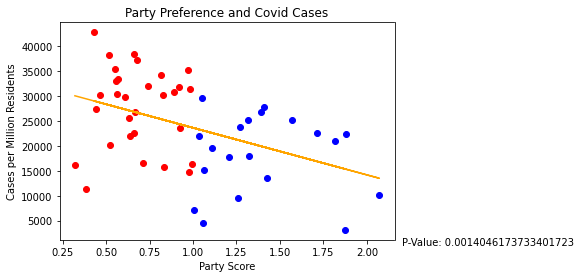

In [241]:
import matplotlib.pyplot as plt
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.linregress(covid_state_politics["Party Score"], covid_state_politics["Cases per capita"])
# linregresult(slope=(-9466.724941731432), intercept=33108.252994614144)
slope = -9466.724941731432
intercept = 33108.252994614144
# rvalue = -0.43954453811755007
pvalue = 0.0014046173733401723
pvaluemarker = "P-Value: {}".format(pvalue)
#stderr= 2792.2825243710254
linreg = (covid_state_politics["Party Score"]*slope+intercept)
partyline = 1
plt.scatter(covid_democrat["Party Score"], covid_democrat["Cases per capita"], c='blue')
plt.scatter(covid_gop["Party Score"], covid_gop["Cases per capita"], c='red')
plt.plot(covid_state_politics["Party Score"],linreg,color="orange")
plt.text(2.2,0,pvaluemarker)
plt.ylabel("Cases per Million Residents")
plt.xlabel("Party Score")
plt.title("Party Preference and Covid Cases")

LinregressResult(slope=261.3071569991663, intercept=304.0439556193455, rvalue=0.28432544329095066, pvalue=0.04537671951634404, stderr=127.17750283599544)

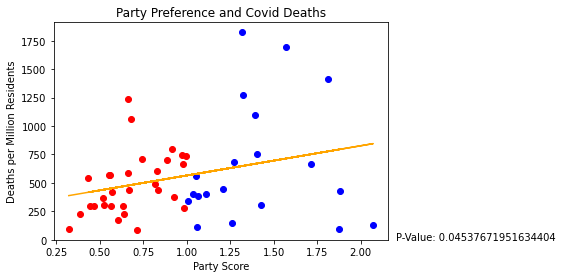

In [240]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.linregress(covid_state_politics["Party Score"], covid_state_politics["Deaths per capita"])
# linregresult(
slope=261.3071569991663
intercept = 304.0439556193455
# rvalue = 0.28432544329095066
pvalue = 0.04537671951634404
pvaluemarker = "P-Value: {}".format(pvalue)
# stderr= 127.17750283599544
linreg = (covid_state_politics["Party Score"]*slope+intercept)
plt.scatter(covid_democrat["Party Score"], covid_democrat["Deaths per capita"], c='blue')
plt.scatter(covid_gop["Party Score"], covid_gop["Deaths per capita"], c='red')
plt.plot(covid_state_politics["Party Score"],linreg,color="orange")
plt.ylabel("Deaths per Million Residents")
plt.xlabel("Party Score")
plt.text(2.2,0,pvaluemarker)
plt.title("Party Preference and Covid Deaths")
st.linregress(covid_state_politics["Party Score"], covid_state_politics["Deaths per capita"])
